# Computer Lab - Semester 3

## Solution of ODE

#### Euler's Method

Any equation which involves derivative of a function is called a **differential equation**. Order of the differential equation is defined by the order of the derivative of the function present in the differential equation. A first order linear differential equation is represented by

\begin{equation}
\frac{dy}{dx}=f(x,y(x))
\end{equation}

To solve this type of equation numerically, we are given an initial condition, i.e. the value of the function at the initial point. If $x=a$ is the starting point, then we must get the value $y(a)$ at $x=a$. Let $y(a)=c$. Geometrically, it is quite obvious that the function $y(x)$ must pass through $(a,c)$. Therefore, the equation of tangent line drawn at the point (a,c) in xy coordinate plane can be written as -

\begin{align}
y - c = \frac{dy}{dx}\mid_{(a,c)}(x - a)
\end{align}

Now, $\frac{dy}{dx}\mid_{(a,c)}=f(a,c)$. Setting, $x-a=h$ as step size or distance between two neighbouring points, we can write the above equation as

\begin{align}
y(a+h) \approx c + f(a,c)\cdot h
\end{align}

Thus the solution passes through a point which is nearly equal to $(a+h, c+f(a,c)h)$. We now repeat this tangent line approximation with (a,c) with successive points separated by a distance $h$. We must replace $(a,c)$ by $(a+h, c+f(a,c)h)$. Keep repeating this tangent line approximation at successive points $x=a,~a+h,~a+2h,\cdots,b$, we get the values of $y(x)$ for all the points between $x=a$ to $x=b$.

Algebraically, the basic idea can be understood in the following way. From calculas, the derivative of a function at a point is given by

\begin{align}
\frac{dy}{dx} = \lim_{h\to 0}\frac{y(x+h)-y(x)}{h}
\end{align}

Here $h>0$ and very small. The above equation can be approximately written as

\begin{align}
\frac{dy}{dx} \approx \frac{y(x+h)-y(x)}{h}
\end{align}

This equation can be solved for $f(x+h)$ to give

\begin{align}
f(x+h) \approx y(x) + h\cdot f(x,y(x))
\end{align}

If we call $y(x+h)$ as "new value", then we can write the above equation as

\begin{align}
y_{\text{new}} = y +h \cdot f(x,y)
\end{align}

We can demonstrate the implementation of Euler's method by using the following tabular format -

| $x$     | $y$                 | $$h\cdot f(x,y)$$|
| :---    | :---                | :---           |
|$a$      | $c$                 | $$h\cdot f(a,c)$$| 
|$a+h$    | $$c + h\cdot f(a,c)$$ | $\cdots$       |
|$a + 2h$ | $\cdots$            |                | 
|$\vdots$ |                     |                |
|$b$      | ???                 | X              |

The goal is to fill out all the blanks of the table except X entry and find the ??? entry, which is the Euler’s method approximation for $y(b)$.

Consider the following ODE
\begin{align}
\frac{dy}{dx}=\frac{y+x}{y-x},\hspace{0.5cm}y(0)=1
\end{align}
Find the value y at x = 0.6, taking the step size = 0.2.

x         y    
------------------
0.0    1.000
0.2    1.200
0.4    1.480
0.6    1.828
------------------


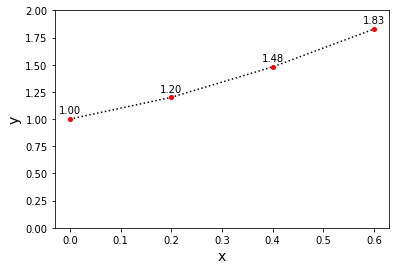

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Discretize the independent variable 'x'
x_init, x_final, step = 0, 0.6, 0.2
x = np.arange(x_init, x_final+step, step)

#Create array for unknown or dependent variable
y = np.zeros(len(x))
y[0] = 1

# Define helper functions
def f(x,y):
	slope = (y+x)/(y-x)
	return slope

def Euler(x, y, h):
	y_new = y + h*f(x, y)
	return y_new

# use recursive relation to find the 'y' values at different grid points of 'x'
h = step
for i in range(len(x)-1):
    y[i+1] = Euler(x[i], y[i], h)

# Tabulating the result
y = y.reshape([-1,1])
x = x.reshape([-1,1])

val = np.hstack([x, y])

print("{0:10s}{1:5s}".format('x','y'))
print('------------------')
for i in range(len(val[:,0])):
    print("{0:0.1f} {1:8.3f}".format(val[:,0][i], val[:,1][i]))
print('------------------')

# Graphical demonstration
plt.plot(x, y, ls=':', color='k', markersize=4)
plt.plot(x, y, 'ro', markersize=4)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

# Displaying values next to point
for i in range(len(y)):
	plt.text(x[i], y[i]+0.05, "%0.2f" %y[i], ha="center")
plt.ylim(0, 2)
plt.show()

#### Modified Euler method

The biggest shortcoming in Euler's method is that the derivative or slope estimated at the begining of the interval is applied through out the interval which generally, is not the case. As a modification, the derivative is estimated at the begining and at the end of the interval and average of the two values is used to estimate the value at the next stage. So, if we consider an interval between $x$ and $x+h$ and the value of $y(x)$ is known, then to estimate the value at $x+h$, we calculate the slope at $x$, which is $\frac{dy}{dx}$ and estimate $y(x+h)$ which is given by

\begin{align}
y(x+h) = y(x) + h\cdot f(x,y)
\end{align}

Let us call this value of $y(x+h)$ as predicted value of $y$ or $y_p$. Using the value of $y_p$, we estimate the slope at $x+h$ which is given by $f(x+h, y_p)$. Let us call

\begin{align}
&k_1 = f(x,y)\\
&k_2 = f(x+h, y_p)
\end{align}

We use the average of $k_1$ and $k_2$ to estimate the value at $x+h$, given by

\begin{align}
y(x+h) = y(x) + \left( \frac{k_1+k_2}{2}\right) \cdot h
\end{align}

This value of $y(x+h)$ is known as *corrector* value or $y_c$.

The previous problem can be solved by modified Euler method by modifying the code in the Euler function. The code snippet is given below.

In [2]:
def modEuler(x, y, h):
    k1 = f(x, y)
    y_p = y + k1*h
    k2 = f(x+h, y_p)
    y_c = y + h*(k1+k2)/2
    return y_c

#### Runge Kutta Method of Second Order

In this method. we estimate the slope at the middle of the interval $(x, x+h)$. Let $f(x, y)$ be the slope at $x$ and the slope at $x+h/2$ be $f(x+h/2, y+k1/2)$. Considering this slope is better estimate for the interval, we use it for the whole interval to estimate the value at $x+h$. This can be shown below -
\begin{align}
&k_1 = f(x,y) \nonumber\\
&k_2 = (x+\frac{h}{2}, y + \frac{h}{2}k_1)\nonumber\\
&y(x+h) = y(x) + h\cdot k_2
\end{align}

Solve the differential equation
\begin{equation}
\frac{dy}{dt}=t+y
\end{equation}

with the initial condition $y(0)=1$, using fourth order Runge-Kutta method from $t=0$ to $t=0.4$ taking $h=0.1$.

In [3]:
def model(t, y):
    return t + y

def rk2Func(x, y, h):
    k1 = model(x, y)
    k2 = model(x+h, y+k1*h)
    y_new = y + k2*h
    return y_new

t = np.arange(0, 0.4 + 0.1, 0.1)
y = np.zeros(len(t))
y[0] = 1
h = 0.1

for i in range(len(t)-1):
    y[i+1] = rk2Func(t[i], y[i], h)
    
# Tabulating the result
y = y.reshape([-1,1])
t = t.reshape([-1,1])

val = np.hstack([t, y])

print("{0:10s}{1:5s}".format('t','y'))
print('------------------')
for i in range(len(val[:,0])):
    print("{0:0.1f} {1:8.3f}".format(val[:,0][i], val[:,1][i]))
print('------------------')

t         y    
------------------
0.0    1.000
0.1    1.120
0.2    1.264
0.3    1.435
0.4    1.636
------------------


#### Runge Kutta Method of 4th Order

4th order Runge-Kutta method is more improved version than 2nd order. In 4th order, we estimate the slope at the half of the interval. Let the slope at $x$ be $f(x,y)$ and we estimate the slope at $x+h/2$ which is $f(x+h/2, y+k_1h/2)$. We can write it as follows - 

\begin{align}
&k_1 = f(x,y)\nonumber\\
&k_2 = f(x+\frac{h}{2},y+\frac{h}{2}\cdot k_1)\nonumber
\end{align}

Assuming $k_2$ to be better estimate of the slope than $k_1$, we use it to find slope at mid-point of the interval. It is given by

\begin{align}
k_3 = f(x+\frac{h}{2},y+\frac{h}{2}\cdot k_2)\nonumber
\end{align}

We consider this slope $k_3$ for the over all interval and find the slope at $x+h$ which is given by

\begin{align}
k_4 = f(x+h, y+h\cdot k_3)
\end{align}

The average of these four slopes is given by

\begin{align}
k_{avg}=\frac{k_1+2k_2+2k_3+k_4}{6}
\end{align}

We use this average value of the slope to estimate $y(x+h)$. This is given by

\begin{align}
y(x+h)=y(x)+h\cdot k_{avg}
\end{align}

Consider the following differential equation:

\begin{equation}
\frac{dy}{dt}=t\sqrt{y(t)}
\end{equation}
with initial condition:<br>
$t_0 = 0$ and $y_0 = y(t_0)=y(0)=1$<br>

The exact solution is<br>
$y(t) = \frac{1}{16}(t^2 + 4)^2$

In [4]:
# Defining all functions

def y_analytic(t):
    return (1/16)*(t**2 + 4)**2

def model(y, t):
    return t*np.sqrt(y)

def rk4(y, t, h):
	k1 = model(y, t)
	k2 = model(y + k1*(h/2), t+h/2)
	k3 = model(y + k2*(h/2), t+h/2)
	k4 = model(y + k3*h, t+h)
	k_avg = (k1 + 2*(k2+k3)+k4)/6
	y_new = y + k_avg*h
	return y_new

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Discretizing time domain and creating array for 'y'

t = np.arange(0, 1.25, 0.25)
y = np.zeros_like(t)
y[0] = 1
h = 0.25

for i in range(len(t)-1):
    y[i+1] = rk4(y[i], t[i], h)

t_range = np.arange(0, 1.01, 0.01)
y_analt = [y_analytic(t) for t in t_range]

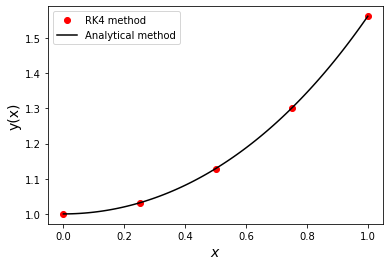

In [6]:
# Comapring the result graphically

plt.plot(t, y, 'ro', label='RK4 method')
plt.plot(t_range, y_analt, 'k-', label='Analytical method')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('y(x)', fontsize=14)
plt.legend()
plt.show()

## First order Differential equations

#### Radioactive Decay

>There are some elements in nature which spontaneously disintegrates by itself without any external influence. Such a process is called **radioactivity** and the elements are called *radioactive elements*.

The rate of decay of any radioactive elements is proportional to the number of elements present at that instant. 
\begin{align}
\frac{dN}{dt}=-\lambda N, \hspace{0.5cm}N(t_0)=N_0 \label{eq1}\tag{1}
\end{align}
The constant of proportionality ($\lambda$) is called *decay constant*. $N_0$ is the number of radioactive element present initially at time $t_0$. The decay constant $\lambda$ can be further expressed as
\begin{align}
\lambda=\frac{0.693}{T_{1/2}}\label{eqref{2}}\tag{2}
\end{align}
Here, $T_{1/2}$ is the half-life of the radioactive element during which half of the radioactive element will decay.

We like to simulate radioactivity for a known source. Hence we have to solve Equation (\ref{eq1}) with appropriate initial condition.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# basic parametrs
N0    = 10000      # initial number of atoms
T_half = 4.5*60
lamda = 0.693/T_half

# Discretize the independent variable 't'
t_init, t_final, step_size = 0, 1000, 0.1
t = np.arange(t_init, t_final, step_size)

# Create array for dependent variable "N"
N = np.zeros(len(t))
N_rk2 = np.zeros(len(t))
N_rk4 = np.zeros(len(t))
N[0] = N0
N_rk2[0] = N0

In [8]:
def model(N, t):
    return -lamda*N

def euler(N, t, h):
    k     = model(N, t)
    N_new = N + k*h
    return N_new

def rk2(N, t, h):
    k1 = model(N, t)
    k2 = model(N+k1*h/2, t+h/2)
    N_new = N + k2*h
    return N_new

In [9]:
# Loop to calculate the value of "N" at different "t" points
h = step_size
for i in range(len(t)-1):
    N[i+1] = euler(N[i], t[i], h)
    N_rk2[i+1] = rk2(N_rk2[i], t[i], h)

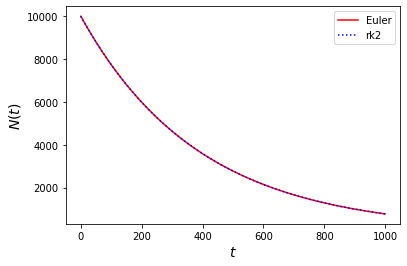

In [10]:
# Visualizing the simulation
plt.plot(t, N, 'r-', label='Euler')
plt.plot(t, N_rk2, 'b:', label="rk2")
plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$N(t)$', fontsize=14)
plt.show()

Simulation done by Euler method and RK2 method gives identical result.

We can solve the problem by taking the help of functions from Scipy. There are two functions - one is `odeint` which solves ordinary differential equation with appropriate initial conditions and the other one is `solve_ivp` which is for solving *initial value problem*.

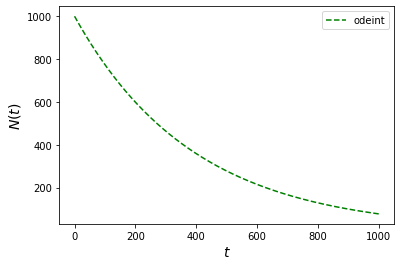

In [11]:
# Solving by odeint
from scipy.integrate import odeint
def model(N, t):
    return -lamda*N

T_half = 4.5*60
lamda = 0.693/T_half
t = np.linspace(0, 1000, 10000)
N0 = 1000
sol = odeint(model, N0, t)

plt.plot(t, sol[:,0], 'g--', label='odeint')
plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$N(t)$', fontsize=14)
plt.show()

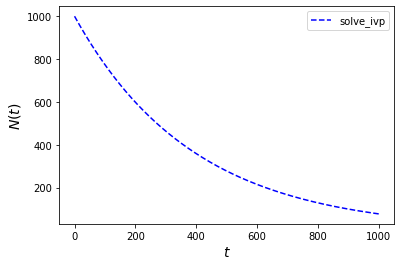

In [12]:
# using solve_ivp function
from scipy.integrate import solve_ivp

def model(t, N):
    return -lamda*N

T_half = 4.5*60
lamda = 0.693/T_half
t = np.linspace(0, 1000, 10000)
N0 = 1000
sol = solve_ivp(model, t_span=(t[0], t[-1]), y0 = [N0], t_eval=t)
t, y = sol.t, sol.y.T

plt.plot(t, y, 'b--', label='solve_ivp')
plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$N(t)$', fontsize=14)
plt.show()

#### Newton's law of cooling

If a hot body is kept at ambient temperature, it will eventually loose heat. The law states that
>The rate of heat loss is directly proportional to the difference of temperature of the body with surrounding. Mathematically, we can represent it
\begin{align}
\frac{dT}{dt} = -k(T - T_0)\label{eq01}\tag{1}
\end{align}

where $k$ is the proportionality constant, $T_0$ is the ambient temperature and $T$ is the temperature of the body at any instant. To model Newton's law of cooling, we have to solve the ODE with appropriate initial condition. I prefer to solve it by RK2 method which is not so sensitive to stepsize of numerical approach, but that happens to be the case incase of Euler's method. One can verify it by taking varying stepsize.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Defing model functions
def model(T, t):
    return -k*(T - T0)

def rk2(T, t, h):
    k1 = model(T, t)
    k2 = model(T + k1*(h/2), t + (h/2))
    T_new = T + k2*h
    return T_new

In [15]:
# Discretizing time domain and creating array for Temperature
t_init, t_final, step_size = 0, 10, 0.1
t = np.arange(t_init, t_final, step_size)
T = np.zeros(len(t))
T[0] = 100
h    = step_size
k    = 0.5
T0   = 30

for i in range(len(t)-1):
    T[i+1] = rk2(T[i], t[i], h)

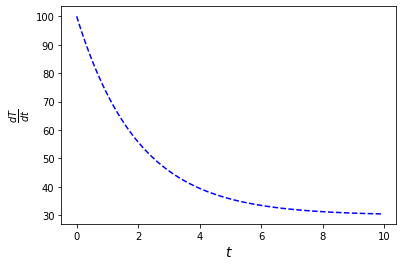

In [16]:
# Visualizing the Cooling process
plt.plot(t, T, 'b--')
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$\\frac{dT}{dt}$', fontsize=14)
plt.show()

We can demonstrate the effect of diiferent values of $k$ on cooling process. Let us take three $k$ values like 0.05, 0.5, 1. Here we have to make minor modification in our functions by passing $k$ value as one of the arguments.

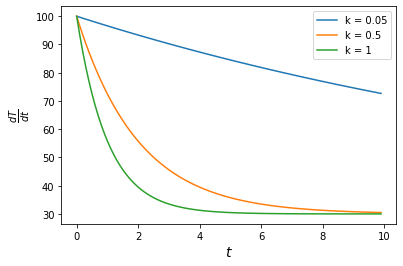

In [17]:
def model(T, t, k):
    return -k*(T - T0)

def rk2(T, t, h, k):
    k1 = model(T, t, k)
    k2 = model(T + k1*(h/2), t + (h/2), k)
    T_new = T + k2*h
    return T_new

k_range = [0.05, 0.5, 1]

for k in k_range:
    for i in range(len(t)-1):
        T[i+1] = rk2(T[i], t[i], h, k)
    plt.plot(t, T, label='k = '+str(k))
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$\\frac{dT}{dt}$', fontsize=14)
plt.legend()
plt.show()

#### Current in RC circuit with DC source

##### During Growth

An electrical circuit containing capacitor (C) and resistor (R) connected to a voltage source V is shown in figure. When the circuit is switched on, the capacitor is gradually charged up. Consider current at any instant $t$ in the circuit is $i$ and corresponding charge on the capacitor is $q$. Charge at any instant on the capacitor can be obtained by applying Kirchoff's voltage law in the closed circuit.

<p align='center'>
<img src="CR-circuit.png" width=200 height=100>
    </p>

\begin{align}
V - iR - \frac{q}{C} = 0 \nonumber\\
V - R\frac{dq}{dt} - \frac{q}{C} = 0\nonumber\\
\frac{dq}{dt} = \frac{V}{R} - \frac{q}{CR}
\end{align}

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [19]:
def model_growth(q, t, params):
    V, R, C = params
    dq_dt = V/R - q/(R*C)
    return dq_dt

In [20]:
# basic parameters
V, R, C = 10, 200, 0.002
params  = [V, R, C]

t_init, t_final, step_size = 0, 5, 0.1
t   = np.arange(t_init, t_final, step_size)   # discretizing the time domain
q   = np.zeros(len(t))                        # creating arrays for storing the values of 'q'
q[0] = 0
q0   = q[0]
h    = step_size

In [21]:
sol = odeint(model_growth, q0, t, args=(params,))
q = sol[:, 0]

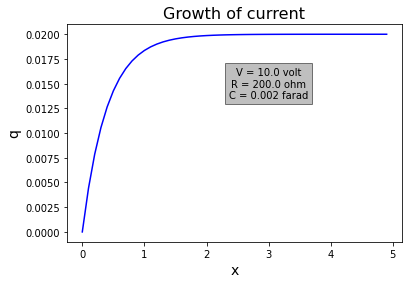

In [22]:
plt.plot(t, q, 'b-')
plt.xlabel('x', fontsize=14)
plt.ylabel('q', fontsize=14)
plt.title('Growth of current', fontsize=16)
txtstr = "\n".join(('V = %0.1f volt'%V, 'R = %0.1f ohm'%R, 'C = %0.3f farad'%C))
plt.text(3, 0.015, txtstr, horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='gray', alpha=0.5))
plt.show()

One can solve the problem using Euler method or RK2 method. The corressponding function will bedefined as follows. One may try this way also.

In [24]:
def Euler_growth(q, t):
    q_new = q + h*model_growth(q, t, params)
    return q_new
	
def rk2_growth(q, t):
    k1 = h*model_growth(q, t, params)
    k2 = h*model_growth(q + k1*h/2, t + h/2, params)
    q_new = q + k2
    return q_new

##### During decay

When capacitor starts discharging, current falls in the circuit. The voltage equation during decay of current is

\begin{align}
&- iR - \frac{q}{C} = 0 \nonumber\\
\implies & - R\frac{dq}{dt} - \frac{q}{C} = 0\nonumber\\
\implies &\frac{dq}{dt} =  - \frac{q}{CR}
\end{align}

In [25]:
def model_decay(q, t, params):
    V, R, C = params
    dq_dt = - q/(R*C)
    return dq_dt

In [26]:
# basic parameters
V, R, C = 10, 200, 0.002
params  = [V, R, C]

t_init, t_final, step_size = 0, 5, 0.1
t   = np.arange(t_init, t_final, step_size)   # discretizing the time domain
q   = np.zeros(len(t))                        # creating arrays for storing the values of 'q'
q[0] = C*V
q0   = q[0]
h    = step_size

In [27]:
sol = odeint(model_decay, q0, t, args=(params,))
q = sol[:, 0]

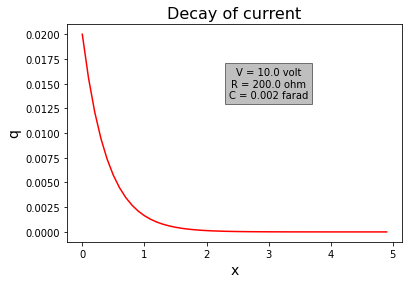

In [28]:
plt.plot(t, q, 'r-')
plt.xlabel('x', fontsize=14)
plt.ylabel('q', fontsize=14)
plt.title('Decay of current', fontsize=16)
txtstr = "\n".join(('V = %0.1f volt'%V, 'R = %0.1f ohm'%R, 'C = %0.3f farad'%C))
plt.text(3, 0.015, txtstr, horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='gray', alpha=0.5))
plt.show()

#### Current in LC circuit

<p align='center'>
<img src="LC-ckt.png" width=200 height=100>
    </p>
\begin{align}
&V_L = V_C \\
\implies &-L\frac{dI}{dt} = \frac{q}{C}\\
\implies &\frac{d^2q}{dt^2} + \frac{1}{LC}q = 0
\end{align}
This is a second order differential equation which can be solved numerically either by Euler method or RK2 method or by using `odeint` function. But, before that we have to break it into two first order differential equations.
\begin{align}
&\frac{dq}{dt} = i \\
&\frac{di}{dt} = \left(-\frac{1}{LC}\right)q
\end{align}

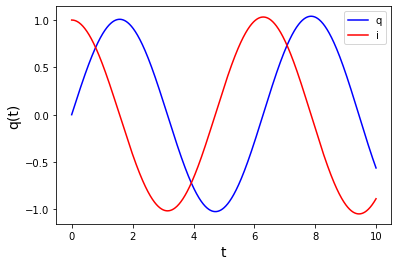

In [29]:
#Basic parameters
L = 1
C = 1

# Discretizing time domain and creating array for 'q' for storing values
t_init, t_final, step_size = 0, 10, 0.01
t = np.arange(t_init, t_final, step_size)
z = np.zeros((len(t),2))
q0, i0 = 0, 1
z[0] = [q0, i0]
h = step_size

# defining functions
def model(z, t):
    q, i = z
    dq_dt = i
    di_dt = -q/(L*C)
    dz_dt = np.array([dq_dt, di_dt])
    return dz_dt

def euler(z,t, h):
    z_new = z + model(z, t)*h
    return z_new

for i in range(len(t)-1):
    z[i+1] = euler(z[i], t[i], h)
q, i = z[:, 0], z[:, 1]

plt.plot(t, q, 'b-', label='q')
plt.plot(t, i, 'r-', label='i')
plt.xlabel('t', fontsize=14)
plt.ylabel('q(t)', fontsize=14)
plt.legend()
plt.show()

#### Laws of motion

##### Rectilinear motion

The instantneous velocity and acceleration, by definition is given by

\begin{align}
v(t) = \frac{dx}{dt} = \lim_{h\to 0}\frac{x(t+h) - x(t)}{h}\\
a(t) = \frac{dv}{dt} = \lim_{h\to 0}\frac{v(t+h) - v(t)}{h}
\end{align}

$h\to 0$ is highly idealized concept, hardly can be achieved in a computer. So, let us consider $h$ to be infinitesimally small, but finite so that the above equations can be written as
\begin{align}
x(t+h) = x(t) + hv(t) \\
v(t+h) = v(t) + ha(t) 
\end{align}
These equations can be converted into a dynamical equations provided we know the force law. Acceleration is then given by
\begin{equation}
a(t) = \frac{F(x, v, t)}{m} 
\end{equation}
Let us now attempt to simulate a particle motion, where the particle starts moving with an initial velocity ($u$). If we consider the particle is acted on by an acceleration ($a$) ignoring for the moment the specific nature of force acting on the particle, then motion of the particle can be simulated over a time range. The time range is discretized into small time step ($h$).

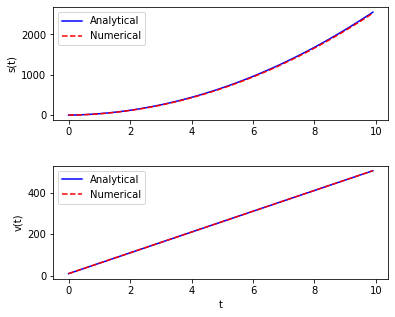

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Calculation of distance and velocity of particle
# Numerical calculation By Euler's method
tmin = 0                          # starting time
tmax = 10                         # ending time
h = 0.1                           # time step
t = np.arange(tmin, tmax, h)
x = np.zeros_like(t)
v = np.zeros_like(t)
u = 10                           # initial velocity
a = 50                           # acceleration
v[0] = u

for i in range(len(t)-1):
    x[i+1] = x[i] + h*v[i]
    v[i+1] = v[i] + h*a

# Analytical method of calculation
S = lambda u, a, t: u*t + 0.5*a*t**2  # distance
V = lambda u, a, t: u + a*t           # velocity

# Plotting graph of distance and velocity
fig = plt.figure(figsize=(6, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(2, 1, 1)
plt.plot(t, S(u, a, t), color='blue', linestyle='solid', label="Analytical")
plt.plot(t, x, color='red', linestyle='dashed', label='Numerical')
plt.ylabel('s(t)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, V(u, a, t), color='blue', linestyle='solid', label="Analytical")
plt.plot(t, v, color='red', linestyle='dashed', label='Numerical')
plt.ylabel('v(t)')
plt.xlabel('t')
plt.legend()
plt.show()

##### Freely falling body

Consider a body falling freely under the action of gravity. So, the acceleration acting on the body is taken to be constant which is equal to $g$. We want to know the position and velocity of the particle at different instant of time. We can use the following lines of code to know the values.

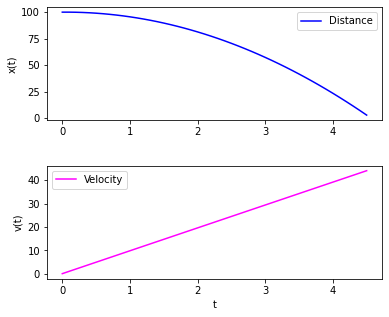

In [31]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
# Free fall without air resistance
H = 500
tmin = 0
tmax = 10
h    = 0.1
g = 9.8

x= 100
v = 0
t = 0
X = []
V = []
T = []

while x>=0:
    X.append(x)
    V.append(v)
    T.append(t)
    x = x - h*v
    v = v + h*g
    t +=h

fig = plt.figure(figsize=(6, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(2,1,1)
plt.plot(T, X, color='blue', label='Distance')
plt.ylabel('x(t)')
plt.legend()
plt.subplot(2,1,2)
plt.plot(T, V, color='magenta', label='Velocity') 
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend()

In the next phase, we can consider viscosity of the medium during free fall of the particle. In this case the net force acting on the particle is the difference of the force of gravity acting downwards and viscous drag acting in the upward direction. The viscous drag can be obtained from Stoke's law which is $6\pi\eta r v$. Therefore, the net force can be written as
\begin{equation}
F_{net} = mg - 6\pi\eta r v
\end{equation}
and hence, the net acceleration acting on the particle is
\begin{equation}
\begin{aligned}
&a = g - \frac{6\pi\eta r}{m}v\\
&a = g - c v\hspace{1cm}\mbox{where,}~ c= \frac{6\pi\eta r}{m}
\end{aligned}
\end{equation}
The programe code to implement the viscous drag effect is given below -

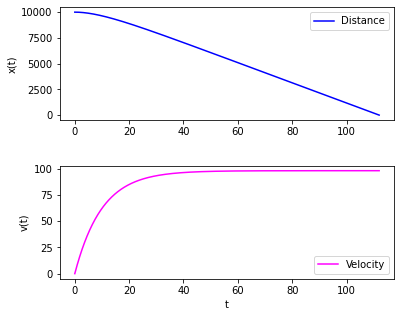

In [32]:
# Free fall with air resistance, terminal velocity
	
def f(v, t):
    return g - c*v

H = 10000
h = 0.1
g = 9.8
c = 0.1

x = H
v = 0
t = 0
X = []
V = []
T = []

while x>=0:
    X.append(x)
    V.append(v)
    T.append(t)
    x = x - h*v
    v = v + h*f(v, t)
    t +=h

fig = plt.figure(figsize=(6, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2,1,1)
#plt.title('Free fall considering viscosity of air')
plt.plot(T, X, color='blue', label='Distance')
plt.ylabel('x(t)')
plt.legend()
plt.subplot(2,1,2)
plt.plot(T, V, color='magenta', label='Velocity') 
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend()
plt.show()

Finally, we can consider the effect of both buoyancy and viscous drag of the medium. The program code can be written as -

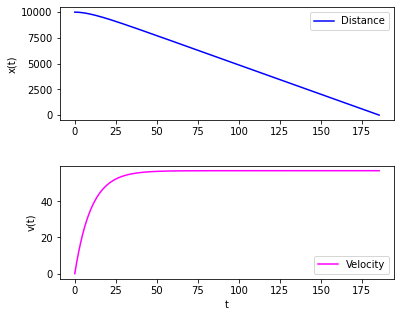

In [33]:
# Free fall considering buoyancy of air and air resistance

m = 10
r = 1
rho = 1
g   = 9.8
F = (m - (4/3)*np.pi*r**3*rho)*g 

def f(v, t):
    return F/m - c*v

H = 10000
h = 0.1
g = 9.8
c = 0.1

x = H
v = 0
t = 0
X = []
V = []
T = []

while x>=0:
    X.append(x)
    V.append(v)
    T.append(t)
    x = x - h*v
    v = v + h*f(v, t)
    t +=h

fig = plt.figure(figsize=(6, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2,1,1)
#plt.title('Free fall considering viscosity of air')
plt.plot(T, X, color='blue', label='Distance')
plt.ylabel('x(t)')
plt.legend()
plt.subplot(2,1,2)
plt.plot(T, V, color='magenta', label='Velocity') 
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend()
plt.show()

##### Projectile motion

There are two forces acting on a projectile - force due to its own weight and drag force due to air resistance. For small velocities, the drag force is proportional to velocity. The Newton's law representing the projectile motion can be written as
\begin{equation}
\begin{aligned}
m\frac{d\vec{v}}{dt} &= \vec{F}_{gravity} + \vec{F}_{drag}\\
&=m\vec{g} - k\vec{v}
\end{aligned}
\end{equation}
$k$ is a constant representing air resistance.

Our goal is to determine position and velocity and hence we solve following two equations -
\begin{eqnarray}
&&\frac{dx}{dt} = v\\
&&m\frac{d\vec{v}}{dt} = -m\vec{g} - k\vec{v}
\end{eqnarray}

We write the equations in terms of components ( along $x$ and $y$ directions)
\begin{eqnarray}
&& \frac{dx}{dt} = v_x \\
&& \frac{dy}{dt} = v_y \\
&& m\frac{dv_x}{dt} = -kv_x \implies \frac{dv_x}{dt} = -\frac{k}{m}v_x  \\
&& m\frac{dv_x}{dt} = -mg - kv_y \implies \frac{dv_x}{dt} = -g - \frac{k}{m}v_y
\end{eqnarray}

We can solve these four equations either by Euler's method or by Runge-Kutta's method of order 2. We shall demonstrate the exercise with Euler's method. Before that we represent the variables in compact form with matrix notation.
\begin{eqnarray}
&& z= [x, y, v_x, v_y]\\
&& \frac{dz}{dt} = [v_x, v_y, -(k/m)v_x, -g - (k/m)v_y]
\end{eqnarray}

The program to implement the above simulation is shown below -

Text(0, 0.5, 'y')

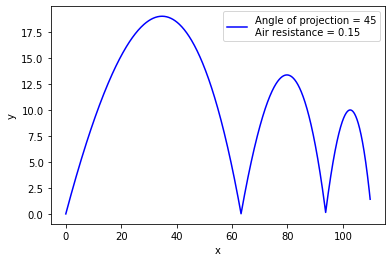

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function
def dz_dt(z, t):
    x, y, vx, vy = z
    return np.array([vx, vy, -(k/m)*vx, -g - (k/m)*vy])

# Basic parameters
k = 0.15
m = 1
g = 9.8
v = 30
theta = 45
x0 = 0
y0 = 0
vx0 = v*np.cos(np.radians(theta))
vy0 = v*np.sin(np.radians(theta))

# Setting time range
h = 0.01
tmin = 0
tmax = 10
t  = np.arange(tmin, tmax, h)
z = np.zeros([len(t), 4])
z[0] = [x0, y0, vx0, vy0]

# Main calculation
for i in range(len(t) - 1):
    z[i+1] = z[i] + h*dz_dt(z[i],t[i])
    if z[i + 1, 1] < 0:
        z[i, 3] = - z[i, 3]
        z[i+1] = z[i] + h*dz_dt(z[i], t[i])

# Unpacking the values and plotting graph
x, y, vx, vy = z[:, 0], z[:, 1], z[:, 2], z[:, 3]

plt.plot(x, y, color='blue', label='Angle of projection = '+str(theta)+'\n'+'Air resistance = '+str(k))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

#### Application of second order differential equation

##### Simple harmonic oscillator

Consider a spring-mass system as a model of an ideal simple harmonic oscillator. Here, a mass ($m$) is attached at the end of a spring. The mass is pulled downward through a distance $x$. The restoring force acting on the spring is $kx$, where $k$ is the spring constant. The equation of motion of sprin-mass system without considering air resistance is given by
\begin{eqnarray}
m\frac{d^2x}{dt^2} &= -kx \nonumber\\
\frac{d^2x}{dt^2} &= -\omega^2x \label{eq14} 
\end{eqnarray} 
where $\omega=\sqrt{\frac{k}{m}}$. The initial condition of the spring-mass system is the mass is pulled through a distance $x_0$ and then released. So the initial conditions can be written as
\begin{align}
&x(t=0) = x_0 \\
&v(t=0) = 0
\end{align}
When solving differential equation numerically, we transform second order or any higher order differential equation into first order differential equation. This can be done through the distance, velocity and acceleration relationship. We can rewrite the equation (\ref{eq14}) as follows -
\begin{eqnarray}
\frac{dx}{dt} &=& v\\
\frac{dv}{dt} &=& - \omega^2 x
\end{eqnarray}
To solve the equation by Euler's method, we write the following two simultaneous recursive relations - 
\begin{eqnarray}
x_{n+1} = x_n + \left(\frac{dx}{dt}\right)\Delta t \label{eq15}\\
v_{n+1} = v_n + \left(\frac{dv}{dt}\right)\Delta t \label{eq16}
\end{eqnarray}
The subscript $n$ refers to $n$ th time step. It is assumed that if the $n$ th. time step is known then $(n+1)$ th. time step can be obtained through the equations (\ref{eq15} and \ref{eq16}). The program code to implement the above idea is given below -

Text(0, 0.5, '$x(t)$')

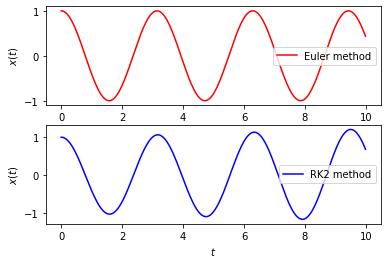

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Helper functions

def dx_dt(x, v, t):
    return v

def dv_dt(x, v, t):
    return - omega**2*x

def euler(x, v, t):
    x +=  dt*dx_dt(x, v, t)
    v += dt*dv_dt(x, v, t)
    return [x, v]



def rk2(x, v, t):
    k1 = dt*dx_dt(x, v, t)
    k2 = dt*dx_dt(x+0.5*k1, v+0.5*k1, t+0.5*dt)
    l1 = dt*dv_dt(x, v, t)
    l2 = dt*dv_dt(x+0.5*l1, v+0.5*l1, t+0.5*dt)
    x += k2
    v += l2
    return [x, v]

# Setting time range and arrays for displacement, velocity
tmin = 0
tmax = 10
dt   = 0.01
t = np.arange(tmin, tmax, dt)
x = np.zeros(len(t))
v = np.copy(x)
x[0] = 1              # initialising distance
v[0] = 0              # initialising velocity
omega = 2

# Calculation of distance and velocity with the help of Euler's method
for i in range(len(t)-1):
    x[i+1], v[i+1] = euler(x[i], v[i], t[i])

# Setting arrays for displacement, velocity
x1 = np.zeros(len(t))
v1 = np.copy(x1)
x1[0] = 1
v1[0] = 0

# Calculation of distance and velocity with the help of RK2 method
for i in range(len(t)-1):
    x1[i+1], v1[i+1] = rk2(x1[i], v1[i], t[i])

# Plotting graph
plt.subplot(2,1,1)
plt.plot(t, x, color='red', label = 'Euler method')
plt.legend()
plt.ylabel('$x(t)$')
plt.subplot(2,1,2)
plt.plot(t, x1, color='blue', label = 'RK2 method')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$x(t)$')

##### Damped simple harmonic oscillator

If the oscillation is affected by air resistance, then we have to modify the equation (\ref{eq14}). If the resistive force is proportional to velocity, then we can write the equation representing the oscillation under the influence of resistive force as 
\begin{equation}
m\frac{d^2x}{dt^2} = - k x - bv 
\end{equation}
This equation after rearrangement can be written as
\begin{equation}
\frac{d^2x}{dt^2} + \frac{b}{m}\frac{dx}{dt} + \frac{k}{m} x = 0 
\label{eq17}
\end{equation}
The equation (\ref{eq17}) represents a damped simple harmonic motion. There are three cases of damping depending on the values of b.

*   $\sqrt{b^2 - 4mk} > 0$: Over damped oscillation,
*   $\sqrt{b^2 - 4mk} = 0$: Critically damped oscillation,
*   $\sqrt{b^2 - 4mk} < 0$: Under damped oscillation,

The equation (\ref{eq17}) can be solved numerically by Euler's method. The program code is given below. The output has been shown in figure (\ref{fig:sho03}) for three different values of $b$ representing three cases of damping oscillation.

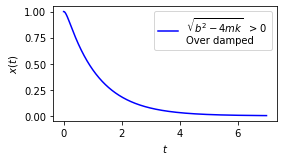

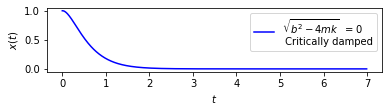

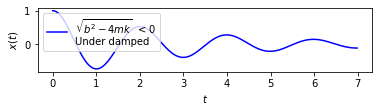

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Helper functions

def dx_dt(x, v, t):
    return v

def dv_dt(x, v, t):
    return - (k/m)*x - (b/m)*v

def euler(x, v, t):
    x +=  dt*dx_dt(x, v, t)
    v += dt*dv_dt(x, v, t)
    return [x, v]

# Setting time range
tmin = 0
tmax = 7
dt   = 0.01
t = np.arange(tmin, tmax, dt)
x = np.zeros(len(t))
v = np.copy(x)

# Initialising distance and velocity
x[0] = 1
v[0] = 0

# Plotting function for different values of damping coefficient
def plot(dampCoeff):
    global b
    b = dampCoeff
    if int(b**2 - 4*m*k) > 0:
        p = ' > 0'
        q = 'Over damped'
    elif int(b**2 - 4*m*k) == 0 :
        p = ' = 0'
        q = ' Critically damped'
    else:
        p = ' < 0'
        q = 'Under damped'
    for i in range(len(t)-1):
        x[i+1] = euler(x[i], v[i], t[i])[0]
        v[i+1] = euler(x[i], v[i], t[i])[1]

    plt.plot(t, x, color='blue', label = '$\sqrt{b^2 - 4mk}$ '+str(p)+'\n'+str(q))
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')

m = 1                 # mass of the oscillator
k = 10                # spring constant
b = np.sqrt(4*m*k)    # damping coefficient
n = 1
fig = plt.figure(figsize=(4,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for bval in [b+0.9*b, b, b-0.9*b]:
    plt.subplot(3,1,n)
    plot(bval)
    n += 1
    plt.show()